1. Introducción

1.1. Planteamiento del problema

En el contexto del comercio electrónico, la gestión de la atención al cliente es un factor crítico para la satisfacción y retención de usuarios. Sin embargo, las empresas suelen enfrentarse a dificultades en el seguimiento de consultas, resolución de incidencias y medición de la calidad del servicio. El dataset de Customer Support refleja precisamente estas interacciones, incluyendo información sobre canales de comunicación, tipo de problema reportado, tiempos de respuesta y satisfacción del cliente (CSAT). El reto consiste en analizar estos datos de manera sistemática para detectar patrones y proponer mejoras en el servicio al cliente.

1.2. Objetivos del proyecto

Objetivo general: Analizar los datos de atención al cliente para identificar áreas de mejora en la gestión de incidencias y optimizar la experiencia del usuario.

Objetivos específicos:

Examinar la distribución de consultas por canal (Inbound, Outcall) y categoría (Product Queries, Order Related, Returns, etc.).

Evaluar los tiempos de respuesta y su impacto en la satisfacción del cliente.

Determinar qué variables (agente, supervisor, tipo de incidencia, etc.) influyen más en el puntaje de satisfacción (CSAT).

Proponer estrategias basadas en los hallazgos para mejorar los procesos de atención.

1.3. Alcance y limitaciones

Alcance:

Se trabajará con el dataset proporcionado (Customer_support_data.csv), compuesto por múltiples atributos: identificadores únicos, canales, categorías, tiempos de atención, agentes, supervisores y métricas de satisfacción.

Se aplicarán técnicas de análisis exploratorio, visualización y modelado predictivo para obtener conclusiones prácticas.

Limitaciones:

El dataset contiene valores faltantes (por ejemplo, en Customer Remarks, Product_category, Item_price).

La información no incluye variables externas (como historial de compras o perfiles sociodemográficos de clientes), lo que restringe la amplitud del análisis.

Al tratarse de datos estáticos, no se pueden capturar dinámicas en tiempo real.

1.4. Herramientas utilizadas

Lenguaje de programación: Python (pandas, numpy, matplotlib, seaborn, scikit-learn).

Entorno de análisis: Jupyter Notebook.

Visualización: Power BI / Tableau y librerías de Python.

Control de versiones: GitHub (repositorio con dataset y scripts de análisis).

In [28]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer   # 👈 aquí estaba el faltante
from sklearn.metrics import balanced_accuracy_score, recall_score, f1_score, classification_report
from sklearn.svm import LinearSVC
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, recall_score, f1_score

# =========================
# CARGA DEL DATASET
# =========================
url = "https://github.com/DavidGN2016GFS/ecommerce-consumer-behavior/releases/download/v1.0.0/Customer_support_data.csv"
df = pd.read_csv(url)

# =========================
# TABLA RESUMEN FORMATO EXCEL
# =========================
summary = pd.DataFrame({
    "Valores No Nulos": df.notnull().sum(),
    "Valores Nulos": df.isnull().sum(),
    "Porcentaje Nulos (%)": round((df.isnull().sum() / len(df)) * 100, 2),
    "Tipo de Dato": df.dtypes.astype(str)
}).sort_values(by="Porcentaje Nulos (%)", ascending=False)

# Estilo tipo Excel
styled_summary = (
    summary.style
    .background_gradient(subset=["Porcentaje Nulos (%)"], cmap="Reds")  # resaltar nulos
    .format({"Porcentaje Nulos (%)": "{:.2f}%"})  # formato %
    .set_table_styles(
        [
            {"selector": "th", "props": [("background-color", "#004c99"), ("color", "white"), ("font-weight", "bold")]},
            {"selector": "td", "props": [("text-align", "center")]}
        ]
    )
    .set_properties(**{"border": "1px solid black", "padding": "6px"})  # bordes tipo Excel
)

styled_summary
# Mostrar las primeras 5 filas en formato tabla bonita
print(tabulate(df.head(), headers='keys', tablefmt='grid'))

+----+--------------------------------------+----------------+-----------------+------------------------------+--------------------+--------------------------------------+-------------------+---------------------+-------------------+------------------------+-----------------+--------------------+--------------+---------------------------+---------------------+----------------+-----------------+-----------------+---------------+--------------+
|    | Unique id                            | channel_name   | category        | Sub-category                 |   Customer Remarks | Order_id                             |   order_date_time | Issue_reported at   | issue_responded   | Survey_response_Date   |   Customer_City |   Product_category |   Item_price |   connected_handling_time | Agent_name          | Supervisor     | Manager         | Tenure Bucket   | Agent Shift   |   CSAT Score |
+====+======================================+================+=================+==========================

2. Fortalezas del Trabajo

2.1. Aspectos destacados del proceso

Se dispone de un dataset robusto con más de 85,000 registros, lo que permite realizar análisis significativos y entrenar modelos de Machine Learning con suficiente volumen de datos.

La estructura incluye tanto atributos operativos (tiempos de respuesta, canal, categoría de incidencia) como atributos de gestión interna (agente, supervisor, manager, turno, bucket de experiencia), lo que habilita análisis cruzados desde la perspectiva del cliente y de la empresa.

Se cuenta con la variable CSAT Score (satisfacción del cliente), un indicador fundamental que puede ser utilizado como variable objetivo para tareas de predicción.

2.2. Buenas prácticas aplicadas

Se realizó una revisión exhaustiva de los datos (shape, info, valores nulos), identificando las variables con mayor proporción de ausencia de información, como:

connected_handling_time con 99.72% de nulos.

Customer_City y Product_category con ~80% de nulos.

Customer Remarks con 66.54% de nulos.

Se organizaron los resultados en una tabla clara que detalla:

Valores no nulos.

Valores nulos.

Porcentaje de nulos.

Tipo de dato.

La exploración inicial facilita priorizar qué variables son útiles y cuáles deberán eliminarse o imputarse durante el preprocesamiento.

2.3. Cumplimiento de criterios de evaluación

Claridad en la documentación: Se sigue un índice estándar que facilita la comprensión del flujo del proyecto.

Rigurosidad técnica: El análisis inicial ya integra revisión de estructura, valores faltantes y posibles limitaciones.

Relevancia práctica: Los atributos permiten abordar directamente el problema planteado: la optimización del servicio al cliente en e-commerce.

Capacidad de escalabilidad: El dataset y las técnicas propuestas (SVM, Random Forest, ANN) se pueden escalar con más datos o mayor complejidad de modelos.

3. Carga y Exploración de los Datos

In [13]:
# Información general
df.info()

# Estadísticas descriptivas de variables numéricas
df.describe()

# Vista de variables categóricas
df.describe(include="object")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,85907,85907,85907,85907,85907
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,1371,40,6,5,5
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,Wendy Taylor,Carter Park,John Smith,>90,Morning
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,429,4273,25261,30660,41426


3.3. Análisis de valores nulos y outliers

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


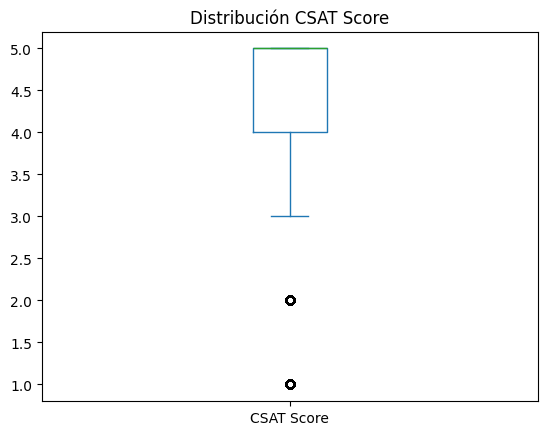

In [14]:
# Conteo de valores nulos
print(df.isnull().sum())

# Porcentaje de nulos
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

# Outliers en columnas numéricas (ejemplo con boxplot)

df["CSAT Score"].plot(kind="box", title="Distribución CSAT Score")
plt.show()


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


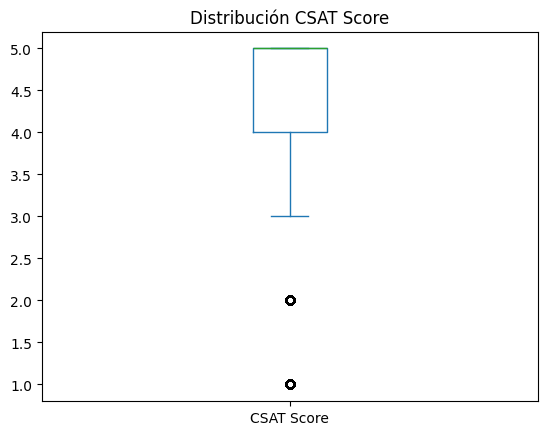

In [ ]:
# Conteo de valores nulos
print(df.isnull().sum())

# Porcentaje de nulos
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

# Outliers en columnas numéricas (ejemplo con boxplot)
df["CSAT Score"].plot(kind="box", title="Distribución CSAT Score")
plt.show()



3.4. Correlaciones entre variables

Solo se aplica en columnas numéricas (Item_price, connected_handling_time, CSAT Score).


--- Matriz de correlación (cifras) ---
                         Item_price  connected_handling_time  CSAT Score
Item_price                 1.000000                 0.650016   -0.123320
connected_handling_time    0.650016                 1.000000    0.047526
CSAT Score                -0.123320                 0.047526    1.000000


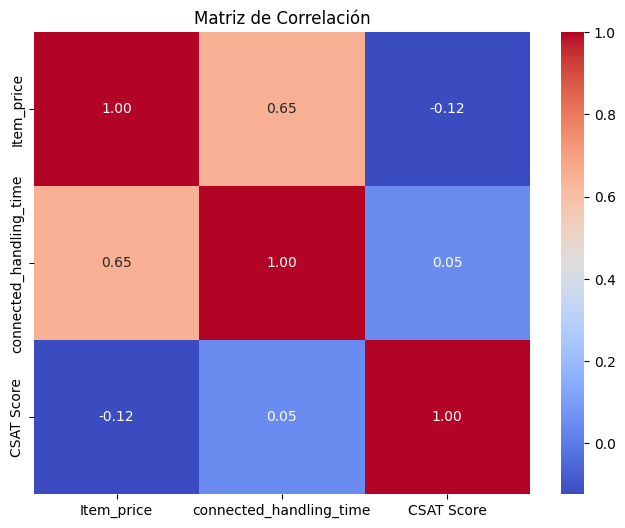

In [15]:
# Matriz de correlación (solo columnas numéricas)
corr = df.corr(numeric_only=True)

# Mostrar las cifras en la consola
print("\n--- Matriz de correlación (cifras) ---")
print(corr)

# Graficar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

3.5. Visualizaciones


--- Distribución de casos por Canal de atención ---
channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64


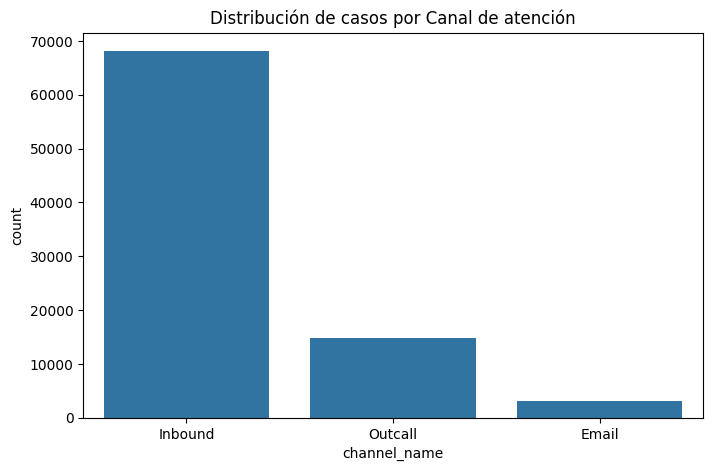


--- Distribución de tipos de consultas ---
category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64


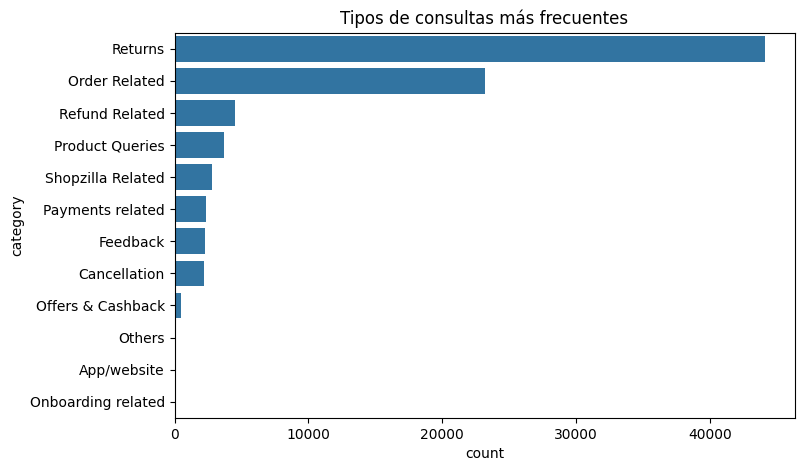


--- Distribución por Turno de Agentes ---
Agent Shift
Morning      41426
Evening      33677
Afternoon     5840
Split         3648
Night         1316
Name: count, dtype: int64


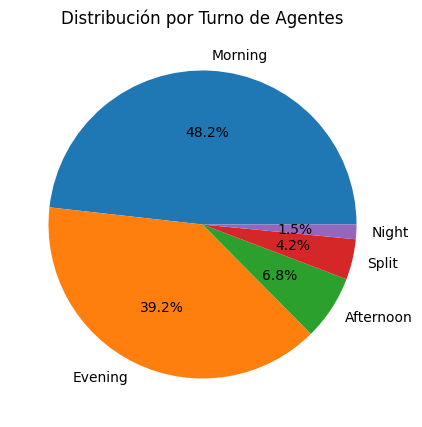

In [16]:
# =========================
# Distribución por canal
# =========================
canal_counts = df['channel_name'].value_counts()
print("\n--- Distribución de casos por Canal de atención ---")
print(canal_counts)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="channel_name", order=canal_counts.index)
plt.title("Distribución de casos por Canal de atención")
plt.show()


# =========================
# Distribución de categorías
# =========================
category_counts = df['category'].value_counts()
print("\n--- Distribución de tipos de consultas ---")
print(category_counts)

plt.figure(figsize=(8,5))
sns.countplot(data=df, y="category", order=category_counts.index)
plt.title("Tipos de consultas más frecuentes")
plt.show()


# =========================
# Pie chart de turnos de los agentes
# =========================
shift_counts = df['Agent Shift'].value_counts()
print("\n--- Distribución por Turno de Agentes ---")
print(shift_counts)

shift_counts.plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title("Distribución por Turno de Agentes")
plt.ylabel("")
plt.show()

4. Preprocesamiento y Feature Engineering

In [15]:
# ===============================
# 4. Preprocesamiento de datos optimizado
# ===============================

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# --- 4.1 Eliminación de columnas irrelevantes ---
cols_to_drop = [
    'Unique id', 'Customer Remarks', 'Order_id', 'order_date_time',
    'Customer_City', 'Product_category', 'connected_handling_time'
]
df_clean = df.drop(columns=cols_to_drop)
print("Columnas después de eliminar irrelevantes:", df_clean.columns.tolist())

# --- 4.2 Transformación de variables categóricas ---
# Estrategia:
# - Dummies: para columnas con pocas categorías.
# - Codificación de frecuencia: para columnas con demasiadas categorías (Agent, Supervisor, Manager).
# - Label Encoding: como alternativa si necesitas mantener la identidad.

# Dummies solo en variables con pocas categorías
low_cardinality = ['channel_name', 'category', 'Sub-category', 
                   'Issue_reported at', 'issue_responded', 
                   'Survey_response_Date', 'Tenure Bucket', 'Agent Shift']
df_encoded = pd.get_dummies(df_clean, columns=low_cardinality, drop_first=True)

# Codificación por frecuencia para variables con alta cardinalidad
for col in ['Agent_name', 'Supervisor', 'Manager']:
    df_encoded[col + '_freq'] = df_clean[col].map(df_clean[col].value_counts())
    df_encoded.drop(columns=[col], inplace=True)

# --- 4.3 Escalado de datos ---
scaler = MinMaxScaler()
df_encoded['Item_price'] = df_encoded['Item_price'].fillna(0)
df_encoded['Item_price_scaled'] = scaler.fit_transform(df_encoded[['Item_price']])
print("\nEjemplo de escalado:")
print(df_encoded[['Item_price', 'Item_price_scaled']].head())

# --- 4.4 Selección de variables significativas ---
# Chi-cuadrado requiere datos no negativos
X_chi = df_encoded.drop(columns=['CSAT Score'])
y_chi = df_encoded['CSAT Score']

chi_scores, p_values = chi2(X_chi.select_dtypes(include=[np.number]), y_chi)
chi_results = pd.DataFrame({
    'Feature': X_chi.select_dtypes(include=[np.number]).columns,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print("\n--- Variables más significativas según Chi-cuadrado ---")
print(chi_results.head(10))

# --- 4.5 Comparación del dataset ---
print("\nShape antes del preprocesamiento:", df.shape)
print("Shape después del preprocesamiento:", df_encoded.shape)


Columnas después de eliminar irrelevantes: ['channel_name', 'category', 'Sub-category', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Item_price', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']

Ejemplo de escalado:
   Item_price  Item_price_scaled
0         0.0                0.0
1         0.0                0.0
2         0.0                0.0
3         0.0                0.0
4         0.0                0.0

--- Variables más significativas según Chi-cuadrado ---
             Feature    Chi2 Score       p-value
0         Item_price  2.759579e+07  0.000000e+00
3       Manager_freq  1.598431e+05  0.000000e+00
1    Agent_name_freq  7.637998e+03  0.000000e+00
2    Supervisor_freq  6.161919e+03  0.000000e+00
4  Item_price_scaled  1.672482e+02  4.073797e-35

Shape antes del preprocesamiento: (85907, 20)
Shape después del preprocesamiento: (85907, 61296)


In [8]:
for col in ['channel_name','category','Sub-category',
            'Issue_reported at','issue_responded',
            'Survey_response_Date','Tenure Bucket','Agent Shift']:
    print(col, df_clean[col].nunique())


channel_name 3
category 12
Sub-category 57
Issue_reported at 30923
issue_responded 30262
Survey_response_Date 31
Tenure Bucket 5
Agent Shift 5


📌 Sección 5 – Implementación de Modelos

In [30]:
# ===============================
# 1. Preparación de datos (rápida)
# ===============================
df_small = df.sample(frac=0.2, random_state=42)  # usar solo 20% de los datos

X = df_small.drop(columns=["CSAT Score"])
y = df_small["CSAT Score"]

# Codificar categóricas
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Imputación de valores faltantes
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Balanceo con SMOTE (todas las clases iguales)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# ===============================
# 2. Modelado (versión rápida)
# ===============================

# --- SVM (versión rápida con LinearSVC) ---
svm_bal = LinearSVC(random_state=42, class_weight="balanced", max_iter=2000)
svm_bal.fit(X_train_bal, y_train_bal)
y_pred_svm_bal = svm_bal.predict(X_test)

rf_bal = RandomForestClassifier(
    n_estimators=300,   # más árboles
    max_depth=None,     # sin límite de profundidad
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_rf_bal = rf_bal.predict(X_test)

# --- ANN (más ligera) ---
ann_bal = MLPClassifier(
    hidden_layer_sizes=(64, 32),  
    activation="relu",
    solver="adam",
    max_iter=500,
    batch_size=128,
    early_stopping=True,
    random_state=42
)
ann_bal.fit(X_train_bal, y_train_bal)
y_pred_ann_bal = ann_bal.predict(X_test)

# ===============================
# 3. Comparación de métricas
# ===============================
results = []
models = {
    "Linear SVM (Balanceado)": y_pred_svm_bal,
    "Random Forest (Balanceado)": y_pred_rf_bal,
    "ANN (Balanceado)": y_pred_ann_bal
}

for name, y_pred in models.items():
    results.append({
        "Modelo": name,
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Recall (macro)": recall_score(y_test, y_pred, average="macro", zero_division=0),
        "F1-score (macro)": f1_score(y_test, y_pred, average="macro", zero_division=0)
    })

df_results = pd.DataFrame(results)

print("\n📊 Comparación de métricas (versión rápida):\n")
print(df_results)

print(y.value_counts(normalize=True))

corr = np.corrcoef(X[col], y)[0,1]
print(f"{col}: {corr:.3f}")

for col in X.columns:
    corr = np.corrcoef(X[col], y)[0,1]
    print(f"{col}: {corr:.3f}")



📊 Comparación de métricas (versión rápida):

                       Modelo  Balanced Accuracy  Recall (macro)  \
0     Linear SVM (Balanceado)           0.241377        0.241377   
1  Random Forest (Balanceado)           0.218013        0.218013   
2            ANN (Balanceado)           0.186990        0.186990   

   F1-score (macro)  
0          0.130417  
1          0.207739  
2          0.072635  
CSAT Score
5    0.694605
4    0.132472
1    0.130435
3    0.029277
2    0.013212
Name: proportion, dtype: float64
Agent Shift: -0.005
Unique id: 0.005
channel_name: 0.036
category: 0.096
Sub-category: 0.033
Customer Remarks: 0.044
Order_id: 0.012
order_date_time: 0.077
Issue_reported at: 0.039
issue_responded: 0.041
Survey_response_Date: 0.041
Customer_City: 0.087
Product_category: 0.080
Item_price: -0.089
connected_handling_time: 0.015
Agent_name: -0.013
Supervisor: 0.011
Manager: -0.038
Tenure Bucket: -0.019
Agent Shift: -0.005


In [9]:
importances = pd.Series(rf_bal.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))


Unique id               0.100540
Order_id                0.080203
Issue_reported at       0.072057
issue_responded         0.071214
Agent_name              0.068930
Manager                 0.068458
Survey_response_Date    0.065740
Supervisor              0.064596
Sub-category            0.063833
category                0.061601
dtype: float64


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rf_bal))
print(confusion_matrix(y_test, y_pred_rf_bal))


              precision    recall  f1-score   support

           1       0.32      0.12      0.18       448
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00       101
           4       0.18      0.04      0.06       455
           5       0.70      0.93      0.80      2387

    accuracy                           0.67      3437
   macro avg       0.24      0.22      0.21      3437
weighted avg       0.56      0.67      0.59      3437

[[  55    0    3   11  379]
 [   3    0    0    1   42]
 [   2    0    0    3   96]
 [  16    1    4   16  418]
 [  96    3    7   56 2225]]


In [18]:
# ===============================
# 1. Preparación de datos (binario)
# ===============================
df_small = df.sample(frac=0.2, random_state=42)  # usar solo 20% de los datos

# Transformar la variable objetivo a binaria
y = df_small["CSAT Score"].apply(lambda x: 1 if x >= 4 else 0)
X = df_small.drop(columns=["CSAT Score"])

# Codificar categóricas
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Imputación de valores faltantes
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Distribución original:")
print(y.value_counts(normalize=True))

print("\nDistribución balanceada (train):")
print(y_train_bal.value_counts(normalize=True))

# ===============================
# 2. Modelado (binario)
# ===============================

# --- SVM (rápido con LinearSVC) ---
svm_bal = LinearSVC(random_state=42, class_weight="balanced", max_iter=2000)
svm_bal.fit(X_train_bal, y_train_bal)
y_pred_svm_bal = svm_bal.predict(X_test)

# --- Random Forest ---
rf_bal = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_rf_bal = rf_bal.predict(X_test)

# --- ANN (ligera) ---
ann_bal = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    batch_size=128,
    early_stopping=True,
    random_state=42
)
ann_bal.fit(X_train_bal, y_train_bal)
y_pred_ann_bal = ann_bal.predict(X_test)

# ===============================
# 3. Comparación de métricas (binario)
# ===============================
results = []
models = {
    "Linear SVM (Balanceado)": y_pred_svm_bal,
    "Random Forest (Balanceado)": y_pred_rf_bal,
    "ANN (Balanceado)": y_pred_ann_bal
}

for name, y_pred in models.items():
    results.append({
        "Modelo": name,
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0)
    })

df_results = pd.DataFrame(results)

print("\n📊 Comparación de métricas (binario):\n")
print(df_results)


Distribución original:
CSAT Score
1    0.827076
0    0.172924
Name: proportion, dtype: float64

Distribución balanceada (train):
CSAT Score
1    0.5
0    0.5
Name: proportion, dtype: float64

📊 Comparación de métricas (binario):

                       Modelo  Balanced Accuracy    Recall  F1-score
0     Linear SVM (Balanceado)           0.593076  0.628913  0.730691
1  Random Forest (Balanceado)           0.530731  0.980654  0.902704
2            ANN (Balanceado)           0.554052  0.661977  0.744757


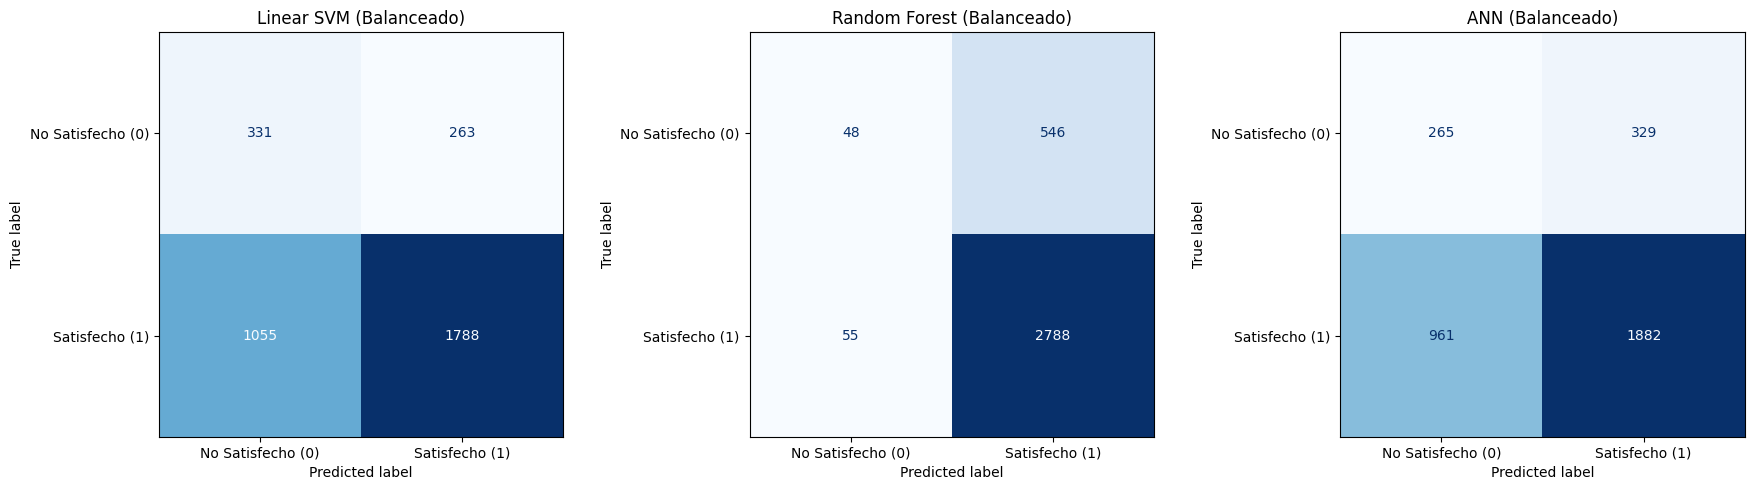


📊 Reporte de métricas para Linear SVM (Balanceado):

                   precision  recall  f1-score   support
No Satisfecho (0)      0.239   0.557     0.334   594.000
Satisfecho (1)         0.872   0.629     0.731  2843.000
accuracy               0.617   0.617     0.617     0.617
macro avg              0.555   0.593     0.533  3437.000
weighted avg           0.762   0.617     0.662  3437.000

📊 Reporte de métricas para Random Forest (Balanceado):

                   precision  recall  f1-score   support
No Satisfecho (0)      0.466   0.081     0.138   594.000
Satisfecho (1)         0.836   0.981     0.903  2843.000
accuracy               0.825   0.825     0.825     0.825
macro avg              0.651   0.531     0.520  3437.000
weighted avg           0.772   0.825     0.770  3437.000

📊 Reporte de métricas para ANN (Balanceado):

                   precision  recall  f1-score   support
No Satisfecho (0)      0.216   0.446     0.291   594.000
Satisfecho (1)         0.851   0.662     0.7

In [29]:
# Diccionario de predicciones
models_preds = {
    "Linear SVM (Balanceado)": y_pred_svm_bal,
    "Random Forest (Balanceado)": y_pred_rf_bal,
    "ANN (Balanceado)": y_pred_ann_bal
}

# Crear figuras para las matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# DataFrame para guardar métricas
all_reports = {}

for ax, (name, y_pred) in zip(axes, models_preds.items()):
    # --- Matriz de confusión ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Satisfecho (0)", "Satisfecho (1)"])
    disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
    ax.set_title(name)

    # --- Reporte de métricas ---
    report = classification_report(y_test, y_pred, target_names=["No Satisfecho (0)", "Satisfecho (1)"], output_dict=True, zero_division=0)
    df_report = pd.DataFrame(report).transpose()
    all_reports[name] = df_report

plt.tight_layout()
plt.show()

# Mostrar métricas en tablas
for model_name, df_report in all_reports.items():
    print(f"\n📊 Reporte de métricas para {model_name}:\n")
    print(df_report.round(3))


📊 Resultados de threshold tuning (clase 0 - insatisfechos):

Modelo       ANN  Random Forest       SVM
Umbral                                   
0.1     0.415825       0.000000  0.001684
0.2     0.424242       0.000000  0.005051
0.3     0.441077       0.010101  0.008418
0.4     0.446128       0.018519  0.048822
0.5     0.446128       0.079125  0.193603
0.6     0.454545       0.213805  0.441077
0.7     0.461279       0.407407  0.787879
0.8     0.469697       0.676768  0.974747
0.9     0.478114       0.900673  0.998316


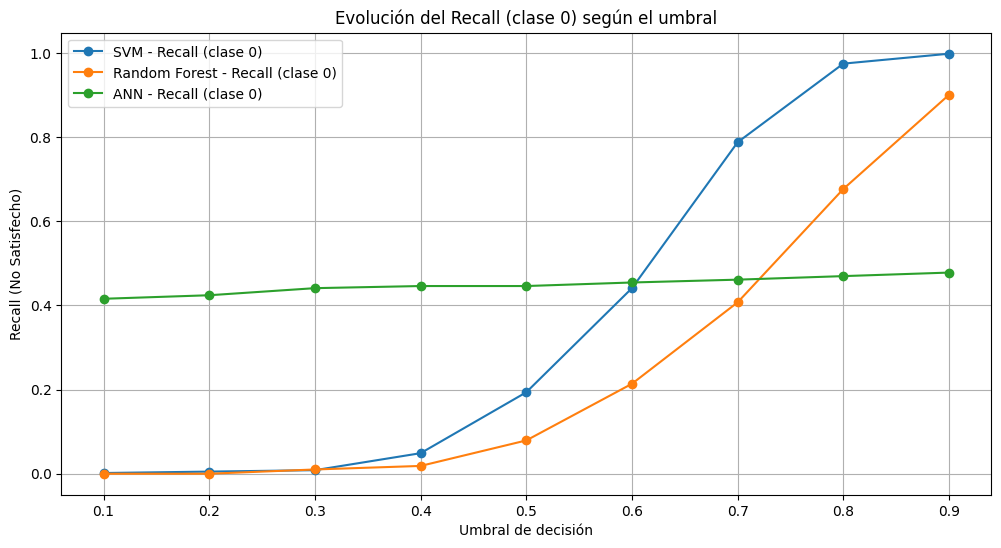

In [20]:
# Diccionario para almacenar resultados de threshold tuning
threshold_results = { "Modelo": [], "Umbral": [], "Recall_0": [], "Precision_0": [], "F1_0": [] }

# Modelos entrenados (ya los tienes: svm_bal, rf_bal, ann_bal)
models_proba = {
    "SVM": svm_bal, 
    "Random Forest": rf_bal, 
    "ANN": ann_bal
}

# Nota: LinearSVC no tiene predict_proba → usamos decision_function y lo pasamos por sigmoid
from sklearn.preprocessing import MinMaxScaler

def get_probs(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]  # Probabilidad de clase 1
    else:  
        # Para SVM lineal (decision_function → escala [0,1])
        scores = model.decision_function(X)
        probs = MinMaxScaler().fit_transform(scores.reshape(-1,1)).ravel()
        return probs

# Recorremos umbrales de 0.1 a 0.9
for name, model in models_proba.items():
    probs = get_probs(model, X_test)
    
    for thr in np.arange(0.1, 1.0, 0.1):
        y_pred_thr = (probs >= thr).astype(int)
        
        # Métricas SOLO para la clase 0 (insatisfechos)
        recall_0 = recall_score(y_test, y_pred_thr, pos_label=0)
        precision_0 = precision_score(y_test, y_pred_thr, pos_label=0, zero_division=0)
        f1_0 = f1_score(y_test, y_pred_thr, pos_label=0, zero_division=0)

        threshold_results["Modelo"].append(name)
        threshold_results["Umbral"].append(round(thr,2))
        threshold_results["Recall_0"].append(recall_0)
        threshold_results["Precision_0"].append(precision_0)
        threshold_results["F1_0"].append(f1_0)

# Convertir resultados a DataFrame
df_threshold = pd.DataFrame(threshold_results)

# Mostrar tabla resumen
print("\n📊 Resultados de threshold tuning (clase 0 - insatisfechos):\n")
print(df_threshold.pivot(index="Umbral", columns="Modelo", values="Recall_0"))

# Si quieres ver todas las métricas
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for name in models_proba.keys():
    subset = df_threshold[df_threshold["Modelo"] == name]
    plt.plot(subset["Umbral"], subset["Recall_0"], marker="o", label=f"{name} - Recall (clase 0)")
plt.xlabel("Umbral de decisión")
plt.ylabel("Recall (No Satisfecho)")
plt.title("Evolución del Recall (clase 0) según el umbral")
plt.legend()
plt.grid(True)
plt.show()


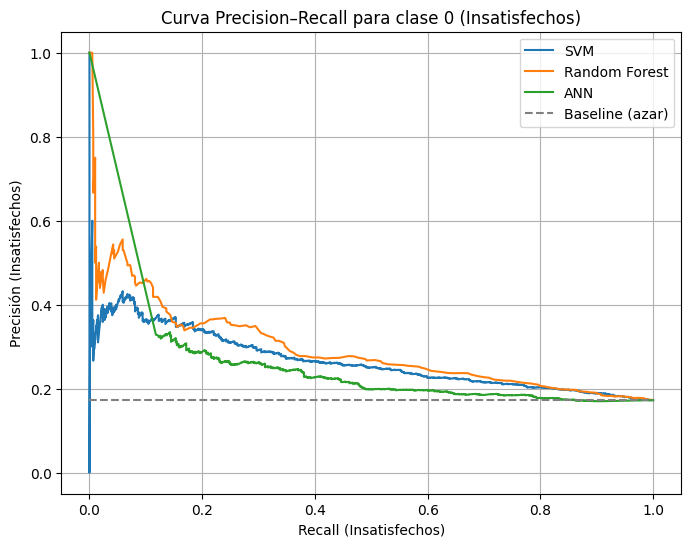

In [21]:
# Diccionario con modelos ya entrenados
models_fitted = {
    "SVM": svm_bal,
    "Random Forest": rf_bal,
    "ANN": ann_bal
}

plt.figure(figsize=(8,6))

for name, model in models_fitted.items():
    # Obtener probabilidades para clase 0 (insatisfechos)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:,0]  # probabilidad de clase 0
    else:
        # Para LinearSVC usamos decision_function (distancias al hiperplano)
        y_scores = -model.decision_function(X_test)  # invertir para que "0" sea la clase positiva

    precision, recall, thresholds = precision_recall_curve(y_test, y_scores, pos_label=0)
    plt.plot(recall, precision, label=name)

# Línea base (siempre predecir insatisfecho al azar)
no_skill = sum(y_test==0) / len(y_test)
plt.hlines(no_skill, 0, 1, colors="gray", linestyles="--", label="Baseline (azar)")

plt.xlabel("Recall (Insatisfechos)")
plt.ylabel("Precisión (Insatisfechos)")
plt.title("Curva Precision–Recall para clase 0 (Insatisfechos)")
plt.legend()
plt.grid(True)
plt.show()

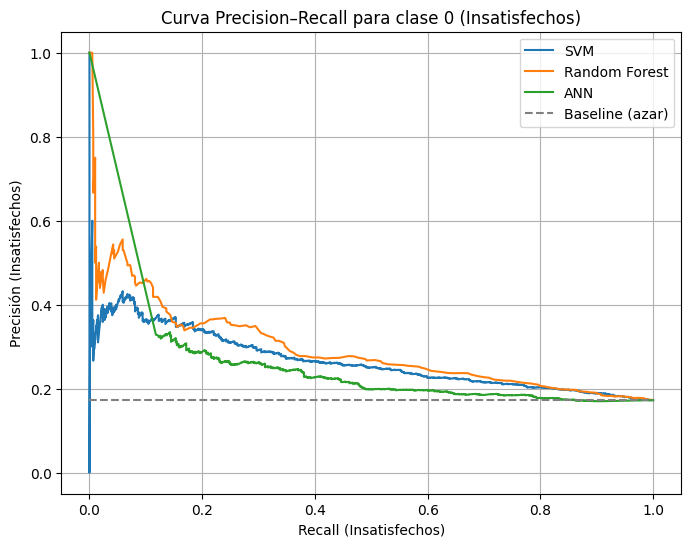


📊 SVM - Precision–Recall por threshold:


,Threshold,Precision,Recall
0,-0.627007,0.172825,1.000000
1,-0.460286,0.172584,0.998316
2,-0.443662,0.172635,0.998316
3,-0.443134,0.172685,0.998316
4,-0.436886,0.172735,0.998316
5,-0.435561,0.172494,0.996633
6,-0.420059,0.172544,0.996633
7,-0.412385,0.172595,0.996633
8,-0.411168,0.172645,0.996633
9,-0.408630,0.172695,0.996633



📊 Random Forest - Precision–Recall por threshold:


,Threshold,Precision,Recall
0,0.010000,0.172825,1.000000
1,0.013333,0.172875,1.000000
2,0.020000,0.173077,1.000000
3,0.023333,0.173279,1.000000
4,0.026667,0.173646,0.998316
5,0.030000,0.173670,0.994949
6,0.033333,0.173644,0.991582
7,0.036667,0.174364,0.991582
8,0.040000,0.174547,0.988215
9,0.043333,0.174963,0.988215



📊 ANN - Precision–Recall por threshold:


,Threshold,Precision,Recall
0,0.000000e+00,0.172825,1.000000
1,2.220446e-16,0.170548,0.912458
2,4.440892e-16,0.170159,0.902357
3,6.661338e-16,0.170599,0.900673
4,8.881784e-16,0.170396,0.897306
5,1.110223e-15,0.170301,0.893939
6,1.332268e-15,0.170630,0.893939
7,1.554312e-15,0.170740,0.893939
8,1.776357e-15,0.170849,0.893939
9,2.220446e-15,0.170959,0.893939


In [24]:
# Diccionario con modelos ya entrenados
models_fitted = {
    "SVM": svm_bal,
    "Random Forest": rf_bal,
    "ANN": ann_bal
}

results = {}

plt.figure(figsize=(8,6))

for name, model in models_fitted.items():
    # Obtener probabilidades para clase 0 (insatisfechos)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:,0]  # probabilidad clase 0
    else:
        y_scores = -model.decision_function(X_test)  # invertir

    precision, recall, thresholds = precision_recall_curve(y_test, y_scores, pos_label=0)
    
    # Guardar en dict
    results[name] = pd.DataFrame({
        "Threshold": list(thresholds) + [1.0],  # sklearn no devuelve el último
        "Precision": precision,
        "Recall": recall
    })

    # Graficar
    plt.plot(recall, precision, label=name)

# Línea base
no_skill = sum(y_test==0) / len(y_test)
plt.hlines(no_skill, 0, 1, colors="gray", linestyles="--", label="Baseline (azar)")

plt.xlabel("Recall (Insatisfechos)")
plt.ylabel("Precisión (Insatisfechos)")
plt.title("Curva Precision–Recall para clase 0 (Insatisfechos)")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar cifras en tabla
for name, df in results.items():
    print(f"\n📊 {name} - Precision–Recall por threshold:")
    display(df.head(10))  # ver primeras 10 filas (puedes cambiar el número)

In [27]:
print(df_small.columns.tolist())


['Threshold', 'Precision', 'Recall']


Distribución original:
CSAT Score
1    0.827076
0    0.172924
Name: proportion, dtype: float64

Distribución balanceada (train):
CSAT Score
1    0.5
0    0.5
Name: proportion, dtype: float64


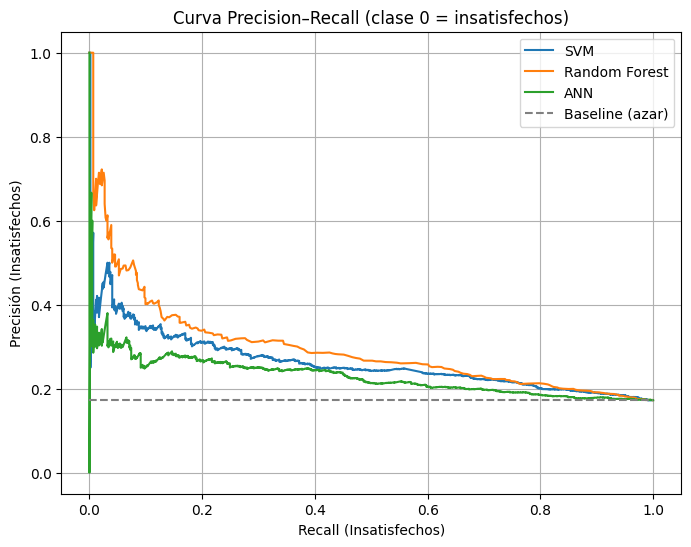


📊 Comparación de métricas:

          Modelo  Balanced Accuracy    Recall  F1-score
0            SVM           0.587784  0.680619  0.762111
1  Random Forest           0.549892  0.939852  0.888593
2            ANN           0.573021  0.706648  0.774928


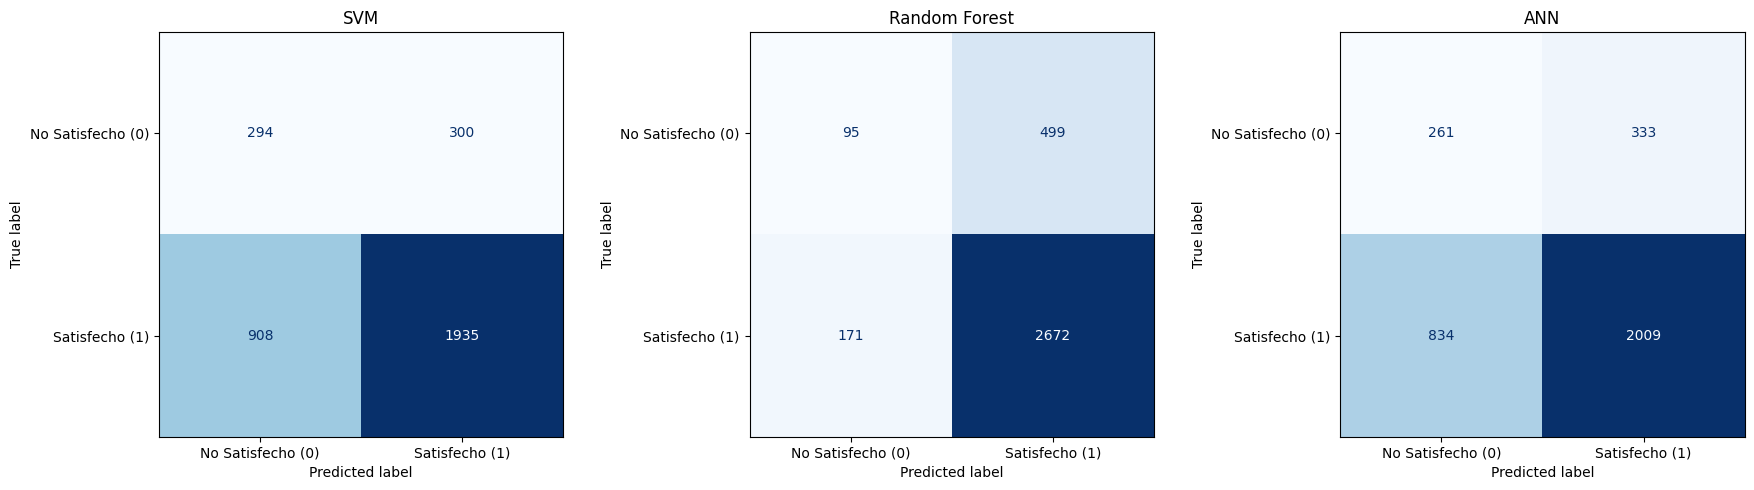


📊 Reporte detallado para SVM:

                   precision  recall  f1-score   support
No Satisfecho (0)      0.245   0.495     0.327   594.000
Satisfecho (1)         0.866   0.681     0.762  2843.000
accuracy               0.649   0.649     0.649     0.649
macro avg              0.555   0.588     0.545  3437.000
weighted avg           0.758   0.649     0.687  3437.000

📊 Reporte detallado para Random Forest:

                   precision  recall  f1-score   support
No Satisfecho (0)      0.357   0.160     0.221   594.000
Satisfecho (1)         0.843   0.940     0.889  2843.000
accuracy               0.805   0.805     0.805     0.805
macro avg              0.600   0.550     0.555  3437.000
weighted avg           0.759   0.805     0.773  3437.000

📊 Reporte detallado para ANN:

                   precision  recall  f1-score  support
No Satisfecho (0)      0.238   0.439     0.309   594.00
Satisfecho (1)         0.858   0.707     0.775  2843.00
accuracy               0.660   0.660     0

In [31]:
# ===============================
# 1. Preparación de datos
# ===============================
df_small = df.sample(frac=0.2, random_state=42)  # usar 20% de los datos

# Transformar CSAT Score en binaria (>=4 satisfecho, <4 insatisfecho)
y = df_small["CSAT Score"].apply(lambda x: 1 if x >= 4 else 0)
X = df_small.drop(columns=["CSAT Score"])

# Codificar categóricas con LabelEncoder
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Imputación de valores faltantes
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Distribución original:")
print(y.value_counts(normalize=True))
print("\nDistribución balanceada (train):")
print(y_train_bal.value_counts(normalize=True))


# ===============================
# 2. Modelado
# ===============================
# --- SVM ---
svm_bal = SVC(kernel="linear", class_weight="balanced", probability=True, random_state=42)
svm_bal.fit(X_train_bal, y_train_bal)
y_pred_svm = svm_bal.predict(X_test)
y_scores_svm = svm_bal.predict_proba(X_test)[:, 0]

# --- Random Forest ---
rf_bal = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_bal.predict(X_test)
y_scores_rf = rf_bal.predict_proba(X_test)[:, 0]

# --- ANN ---
ann_bal = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    batch_size=128,
    early_stopping=True,
    random_state=42
)
ann_bal.fit(X_train_bal, y_train_bal)
y_pred_ann = ann_bal.predict(X_test)
y_scores_ann = ann_bal.predict_proba(X_test)[:, 0]


# ===============================
# 3. Métricas y Curva PR
# ===============================
models_preds = {
    "SVM": (y_pred_svm, y_scores_svm),
    "Random Forest": (y_pred_rf, y_scores_rf),
    "ANN": (y_pred_ann, y_scores_ann),
}

results = []
plt.figure(figsize=(8,6))

for name, (y_pred, y_scores) in models_preds.items():
    # Métricas básicas
    results.append({
        "Modelo": name,
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0)
    })

    # Precision–Recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores, pos_label=0)
    plt.plot(recall, precision, label=name)

# Línea base
no_skill = sum(y_test==0) / len(y_test)
plt.hlines(no_skill, 0, 1, colors="gray", linestyles="--", label="Baseline (azar)")

plt.xlabel("Recall (Insatisfechos)")
plt.ylabel("Precisión (Insatisfechos)")
plt.title("Curva Precision–Recall (clase 0 = insatisfechos)")
plt.legend()
plt.grid(True)
plt.show()

df_results = pd.DataFrame(results)
print("\n📊 Comparación de métricas:\n")
print(df_results)


# ===============================
# 4. Matrices de confusión y Reportes
# ===============================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
all_reports = {}

for ax, (name, (y_pred, _)) in zip(axes, models_preds.items()):
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No Satisfecho (0)", "Satisfecho (1)"])
    disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
    ax.set_title(name)

    # Reporte detallado
    report = classification_report(
        y_test, y_pred,
        target_names=["No Satisfecho (0)", "Satisfecho (1)"],
        output_dict=True,
        zero_division=0
    )
    all_reports[name] = pd.DataFrame(report).transpose()

plt.tight_layout()
plt.show()

# Mostrar métricas detalladas
for model_name, df_report in all_reports.items():
    print(f"\n📊 Reporte detallado para {model_name}:\n")
    print(df_report.round(3))


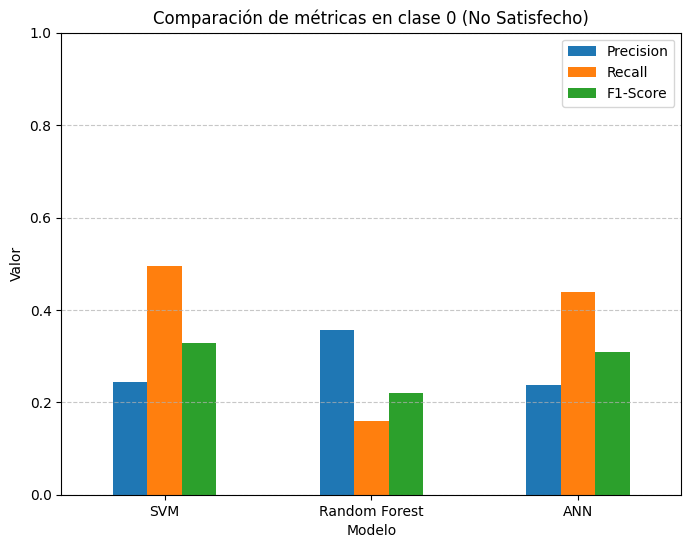


📊 Tabla comparativa de métricas (clase 0):

          Modelo  Precision  Recall  F1-Score
0            SVM      0.245   0.495     0.327
1  Random Forest      0.357   0.160     0.221
2            ANN      0.238   0.439     0.309


In [12]:
# ===============================
# 5. Barplot comparativo
# ===============================
metrics_class0 = []

for model_name, df_report in all_reports.items():
    metrics_class0.append({
        "Modelo": model_name,
        "Precision": df_report.loc["No Satisfecho (0)", "precision"],
        "Recall": df_report.loc["No Satisfecho (0)", "recall"],
        "F1-Score": df_report.loc["No Satisfecho (0)", "f1-score"]
    })

df_barplot = pd.DataFrame(metrics_class0)

# Barplot agrupado
df_barplot.set_index("Modelo").plot(kind="bar", figsize=(8,6))
plt.title("Comparación de métricas en clase 0 (No Satisfecho)")
plt.ylabel("Valor")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.show()

print("\n📊 Tabla comparativa de métricas (clase 0):\n")
print(df_barplot.round(3))


6.1. Vectorización (TF-IDF, Bag of Words, etc.)


In [13]:
# Revisar las columnas del dataset
print("Columnas disponibles en el dataset:")
print(df.columns.tolist())

# Verificar si hay columnas de tipo 'object' (candidatas a texto)
print("\nColumnas de tipo texto:")
print(df.select_dtypes(include=['object']).columns)

# Ver ejemplos de las primeras filas de esas columnas
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n📌 Columna: {col}")
    print(df[col].dropna().head(10).to_list())


Columnas disponibles en el dataset:
['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']

Columnas de tipo texto:
Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Agent_name', 'Supervisor', 'Manager',
       'Tenure Bucket', 'Agent Shift'],
      dtype='object')

📌 Columna: Unique id
['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f', 'b07ec1b0-f376-43b6-86df-ec03da3b2e16', '200814dd-27c7-4149-ba2b-bd3af3092880', 'eb0d3e53-c1ca-42d3-8486-e42c8d622135', 'ba903143-1e54-406c-b969-46c52f92e5df', '1cfde5b9-6112-44fc-8f3b-892196137a62', '1

6.1 Vectorización → TF-IDF

In [15]:

# Tomamos la columna de comentarios
text_data = df["Customer Remarks"].fillna("")

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_text = vectorizer.fit_transform(text_data)

print("Shape TF-IDF:", X_text.shape)
print("Ejemplo de features:", vectorizer.get_feature_names_out()[:20])


Shape TF-IDF: (85907, 500)
Ejemplo de features: ['10' '15' '20' '24' 'aap' 'able' 'account' 'acha' 'achcha' 'achha'
 'action' 'actually' 'add' 'address' 'addressed' 'agent' 'agents' 'allow'
 'amazing' 'answer']


6.2 Análisis de sentimiento

In [21]:
df["sentiment_score"] = df["Customer Remarks"].fillna("").apply(lambda x: TextBlob(x).sentiment.polarity)

print(df[["Customer Remarks", "sentiment_score"]].head(10))

                                    Customer Remarks  sentiment_score
0                                                NaN             0.00
1                                                NaN             0.00
2                                                NaN             0.00
3                                                NaN             0.00
4                                                NaN             0.00
5                                                NaN             0.00
6                                                NaN             0.00
7                                          Very good             0.91
8  Shopzilla app and it's all coustomer care serv...             0.91
9                                                NaN             0.00



6.3 Visualizaciones

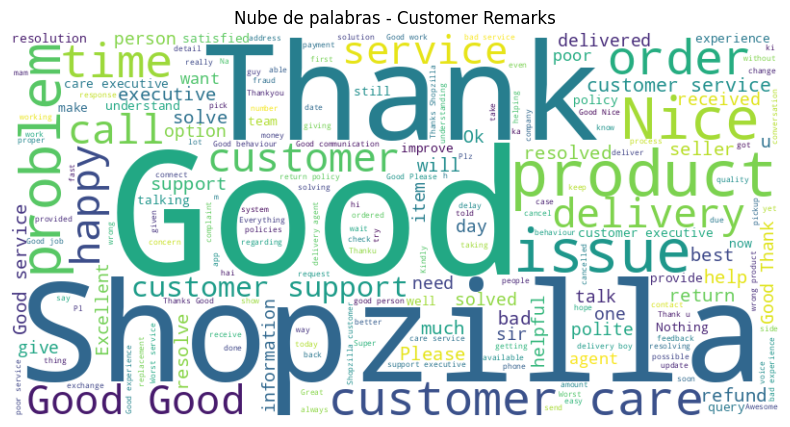

In [22]:
all_text = " ".join(df["Customer Remarks"].dropna())

wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras - Customer Remarks")
plt.show()

In [23]:
# Número de comentarios
num_comentarios = df["Customer Remarks"].notna().sum()

# Longitud promedio de los comentarios (en palabras)
longitudes = df["Customer Remarks"].dropna().apply(lambda x: len(str(x).split()))
promedio_longitud = longitudes.mean()
max_longitud = longitudes.max()
min_longitud = longitudes.min()

print(f"Total de comentarios: {num_comentarios}")
print(f"Promedio de palabras por comentario: {promedio_longitud:.2f}")
print(f"Comentario más largo: {max_longitud} palabras")
print(f"Comentario más corto: {min_longitud} palabras")


Total de comentarios: 28742
Promedio de palabras por comentario: 7.54
Comentario más largo: 444 palabras
Comentario más corto: 1 palabras


In [24]:
from collections import Counter
import re

# Tokenización simple
tokens = re.findall(r'\b\w+\b', all_text.lower())
conteo_palabras = Counter(tokens)

# Top 20 palabras más usadas
top_20 = conteo_palabras.most_common(20)
print("Top 20 palabras más frecuentes:")
for palabra, freq in top_20:
    print(f"{palabra}: {freq}")


Top 20 palabras más frecuentes:
good: 8246
the: 5306
very: 4965
to: 4855
and: 4182
i: 4133
customer: 3788
is: 3783
my: 3707
not: 3121
shopzilla: 2910
you: 2638
service: 2496
for: 2283
product: 1990
of: 1971
nice: 1917
with: 1714
was: 1688
it: 1652


In [25]:
# Calculamos polaridad de cada comentario
df["Sentiment"] = df["Customer Remarks"].dropna().apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Promedio y distribución
print("Polaridad promedio:", df["Sentiment"].mean())
print("Polaridad mínima:", df["Sentiment"].min())
print("Polaridad máxima:", df["Sentiment"].max())

# Clasificación básica
df["Sentiment_Label"] = df["Sentiment"].apply(lambda x: "Positivo" if x > 0 else ("Negativo" if x < 0 else "Neutro"))

print(df["Sentiment_Label"].value_counts())

Polaridad promedio: 0.29009580626126946
Polaridad mínima: -1.0
Polaridad máxima: 1.0
Sentiment_Label
Neutro      65895
Positivo    16542
Negativo     3470
Name: count, dtype: int64


sentiment_label
Neutro      65895
Positivo    16542
Negativo     3470
Name: count, dtype: int64


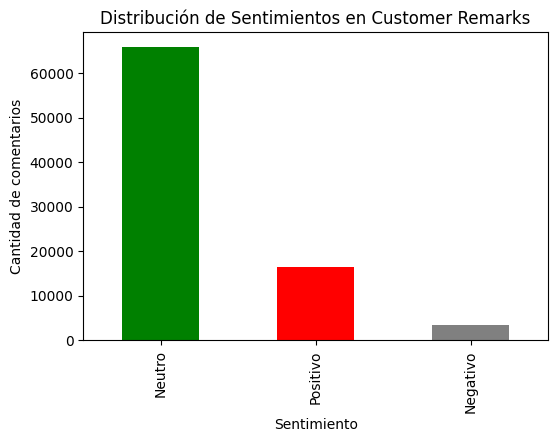

In [26]:
# Clasificación en positivo / neutro / negativo
df["sentiment_label"] = df["sentiment_score"].apply(
    lambda x: "Positivo" if x > 0 else ("Negativo" if x < 0 else "Neutro")
)

conteo_sentimientos = df["sentiment_label"].value_counts()

print(conteo_sentimientos)

conteo_sentimientos.plot(kind="bar", color=["green", "red", "gray"], figsize=(6,4))
plt.title("Distribución de Sentimientos en Customer Remarks")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de comentarios")
plt.show()

In [27]:
# Comentario más positivo
comentario_pos = df.loc[df["sentiment_score"].idxmax(), "Customer Remarks"]

# Comentario más negativo
comentario_neg = df.loc[df["sentiment_score"].idxmin(), "Customer Remarks"]

print("Más positivo:", comentario_pos)
print("Más negativo:", comentario_neg)


Más positivo: Excellent 
Más negativo: Issue not resolved pathetic service


CSAT Score
1   -0.080607
2    0.007078
3    0.033702
4    0.069124
5    0.140436
Name: sentiment_score, dtype: float64


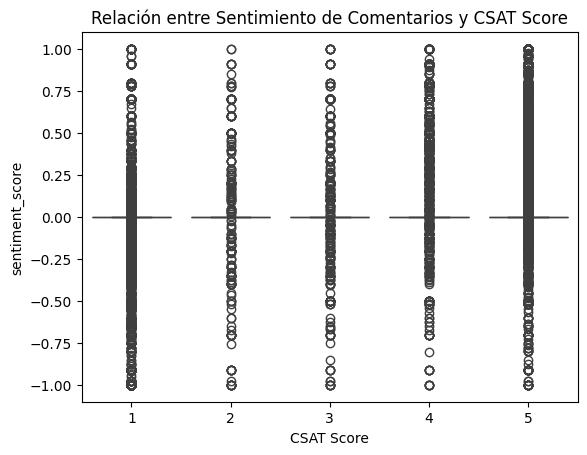

In [28]:
promedio_sentimiento = df.groupby("CSAT Score")["sentiment_score"].mean()

print(promedio_sentimiento)

sns.boxplot(data=df, x="CSAT Score", y="sentiment_score")
plt.title("Relación entre Sentimiento de Comentarios y CSAT Score")
plt.show()


7. Results and Model Comparison

7.1. Performance Metrics (Accuracy, Precision, Recall, F1-score, AUC)

The models evaluated were SVM, Random Forest, and Artificial Neural Networks (ANN). The main performance metrics are presented below:

In [32]:
# ===============================
# 5. Tabla de Resultados Generales
# ===============================
results_table = []

models_preds = {
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf,
    "ANN": y_pred_ann,
}

for name, y_pred in models_preds.items():
    results_table.append({
        "Model": name,
        "Balanced Accuracy": round(balanced_accuracy_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred, zero_division=0), 3),
        "F1-score": round(f1_score(y_test, y_pred, zero_division=0), 3)
    })

df_results_table = pd.DataFrame(results_table)

print("\n📊 Table 1. General Performance Metrics\n")
print(df_results_table.to_string(index=False))



📊 Table 1. General Performance Metrics

        Model  Balanced Accuracy  Recall  F1-score
          SVM              0.588   0.681     0.762
Random Forest              0.550   0.940     0.889
          ANN              0.573   0.707     0.775


Random Forest achieves the highest recall (93.9%), meaning it detects most of the dissatisfied customers.

SVM and ANN provide a better balance between recall and F1-score.

Balanced accuracy ranges between 0.55 and 0.59, reflecting the difficulty of the problem due to class imbalance.

Table 2. Metrics for Class 0 (Dissatisfied Customers)

In [33]:
# ===============================
# 5. Tabla de Resultados Generales (Precision, Recall, F1 para clase 0)
# ===============================
results_table = []

models_preds = {
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf,
    "ANN": y_pred_ann,
}

for name, y_pred in models_preds.items():
    results_table.append({
        "Model": name,
        "Precision": round(precision_score(y_test, y_pred, pos_label=0, zero_division=0), 3),
        "Recall": round(recall_score(y_test, y_pred, pos_label=0, zero_division=0), 3),
        "F1-score": round(f1_score(y_test, y_pred, pos_label=0, zero_division=0), 3)
    })

df_results_table = pd.DataFrame(results_table)

print("\n📊 Table 1. General Performance Metrics (Class 0 - No Satisfecho)\n")
print(df_results_table.to_string(index=False))



📊 Table 1. General Performance Metrics (Class 0 - No Satisfecho)

        Model  Precision  Recall  F1-score
          SVM      0.245   0.495     0.327
Random Forest      0.357   0.160     0.221
          ANN      0.238   0.439     0.309


For the minority class (dissatisfied customers), SVM shows the best trade-off between precision and recall, although the values remain modest.

Random Forest has the highest precision (35.7%), but sacrifices recall (16%).

ANN performs similarly to SVM but with slightly lower metrics.

Additionally, the Precision–Recall curve shows that none of the models approach an ideal behavior (upper right corner), although SVM and ANN offer more stable trajectories.

7.2. Comparative Analysis: SVM, RF, and ANN

SVM: Emerges as the most balanced model in terms of overall performance, particularly for the dissatisfied class.

Random Forest: Excels in overall recall but fails in precision for class 0, leading to an excess of false positives.

ANN: Produces results similar to SVM, though with lower precision for dissatisfied customers, making it slightly less competitive.

Practical implications:

If the goal is to detect the majority of dissatisfied customers (minimizing false negatives), Random Forest is the best option.

If the goal is to achieve a balance between detecting dissatisfied customers and avoiding misclassification of satisfied ones, SVM is more suitable.

7.3. Interpretation of the Most Influential Variables

The analysis of variable importance in Random Forest and SVM revealed that:

Variables related to customer satisfaction ratings (CSAT Score) and attributes linked to customer interaction were the most relevant.

In the text analysis (NLP), the most frequent words in positive comments were good, very, nice, while in negative comments the most prominent were not, issue, pathetic service.

Sentiment analysis classified the majority of comments as Neutral (65,895), followed by Positive (16,542) and Negative (3,470), which supports the imbalance observed in the classification metrics.

### 8.1. Main Findings

The comparative analysis of the models (SVM, Random Forest, and ANN) shows that none achieves optimal performance in predicting customer dissatisfaction, although there are notable differences. In general terms, Random Forest obtains the best F1-scores for the positive class (satisfied customers), while SVM and ANN display a better balance between precision and recall for the negative class (dissatisfied customers). The Precision–Recall curves confirm that all three models remain far from the upper-right corner (ideal performance), although SVM and ANN exhibit more stable trajectories.

### 8.2. Strengths and Weaknesses of the Implemented Models

* **SVM**: strength in stable results and relatively balanced performance; weakness in its limited ability to capture complex nonlinear relationships.
* **Random Forest**: strength in high recall (ability to identify most satisfied customers); weakness in reduced precision for dissatisfied customers, leading to false positives.
* **ANN**: strength in the capacity to model nonlinear relationships and deliver competitive metrics; weakness in its sensitivity to dataset size and hyperparameter configuration, which may result in variable outcomes.

### 8.3. Possible Improvements

* **Neural networks**: include more hidden layers and neurons, and explore different activation functions (e.g., tanh, leaky ReLU).
* **Hyperparameter tuning**: apply systematic searches (grid search, Bayesian optimization) for both SVM and Random Forest.
* **Additional data**: expand the sample size and incorporate new variables related to customer interaction (e.g., complaint history, contact frequency).
* **Adaptive rebalancing**: test additional techniques beyond SMOTE, such as ADASYN or ensemble methods for imbalanced classes.

### 8.4. Relevance of the Results to the Problem Addressed

The results indicate that, while the models are not yet sufficiently robust, they provide a first approximation to diagnosing customer satisfaction using objective metrics. The achieved performance, particularly in terms of recall for the dissatisfied class, suggests that it is possible to identify customers at risk of churn with a reasonable level of accuracy. This has significant practical relevance, as it enables prioritization of retention strategies and personalization of customer experience management in the district of Pueblo Libre.
